In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os

In [3]:
path = "./PCBData/defects"

In [4]:
datagenAug = ImageDataGenerator(
    rotation_range=90,
	zoom_range=0.15,
	horizontal_flip=True,
	vertical_flip=True,
	validation_split=0.2
)

In [5]:
trainGen = datagenAug.flow_from_directory(
    path, 
    classes=["open", "short", "mousebit", 
             "spur", "copper", "pin-hole"],
    target_size=(224, 224), 
    color_mode='grayscale',
    class_mode="sparse",
    batch_size=64, 
    subset="training")

testGen = datagenAug.flow_from_directory(
    path, 
    classes=["open", "short", "mousebit", 
             "spur", "copper", "pin-hole"],
    target_size=(224, 224), 
    color_mode='grayscale',
    class_mode="sparse",
    batch_size=64, 
    subset="validation")


Found 8012 images belonging to 6 classes.
Found 2001 images belonging to 6 classes.


In [6]:
trainGen.image_shape

(224, 224, 1)

In [7]:
trainGen.classes

array([0, 0, 0, ..., 5, 5, 5])

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# from sklearn.model_selection import train_test_split

In [11]:
del model

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,1)))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, kernel_size=(3,3),activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(256, kernel_size=(3,3),activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3,3),activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(512, kernel_size=(3,3),activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3,3),activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(512, kernel_size=(3,3),activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3,3),activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

c:\ProgramData\anaconda3\envs\PCB_CNN\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,562,182 (105.14 MB)

 Trainable params: 27,562,182 (105.14 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [16]:
checkpoint = ModelCheckpoint('./model/not_use_vgg16_2.keras',
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False)
early_stopping = EarlyStopping(monitor='val_accuracy',
                      patience=5, 
                      verbose=1)

In [17]:
history = model.fit(trainGen,
                    epochs=50,
                    validation_data=testGen,
                    callbacks=[checkpoint, early_stopping])

Epoch 1/50


c:\ProgramData\anaconda3\envs\PCB_CNN\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.4066 - loss: 39.1791 
Epoch 1: val_accuracy improved from -inf to 0.98201, saving model to ./model/not_use_vgg16_2.keras
126/126 ━━━━━━━━━━━━━━━━━━━━ 1438s 11s/step - accuracy: 0.4084 - loss: 38.9450 - val_accuracy: 0.9820 - val_loss: 0.0680
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9442 - loss: 0.1851 
Epoch 2: val_accuracy improved from 0.98201 to 0.98851, saving model to ./model/not_use_vgg16_2.keras
126/126 ━━━━━━━━━━━━━━━━━━━━ 1476s 12s/step - accuracy: 0.9443 - loss: 0.1850 - val_accuracy: 0.9885 - val_loss: 0.0496
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9626 - loss: 0.1346 
Epoch 3: val_accuracy improved from 0.98851 to 0.99100, saving model to ./model/not_use_vgg16_2.keras
126/126 ━━━━━━━━━━━━━━━━━━━━ 1483s 12s/step - accuracy: 0.9627 - loss: 0.1346 - val_accuracy: 0.9910 - val_loss: 0.0350
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9698 - loss: 0.1176

In [18]:
history.history

{'accuracy': [0.6407887935638428,
  0.9490764141082764,
  0.963804304599762,
  0.9704193472862244,
  0.9759111404418945,
  0.9767848253250122,
  0.9822765588760376,
  0.9811532497406006,
  0.9837743639945984,
  0.9824013710021973,
  0.9811532497406006,
  0.9848976731300354,
  0.9880179762840271,
  0.9868946671485901,
  0.9876435399055481,
  0.9885172247886658],
 'loss': [9.443571090698242,
  0.17690441012382507,
  0.13339264690876007,
  0.1079554334282875,
  0.08813822269439697,
  0.08431015908718109,
  0.07087699323892593,
  0.06690853089094162,
  0.059308215975761414,
  0.061269089579582214,
  0.07574839890003204,
  0.05262086167931557,
  0.05098620802164078,
  0.04871116206049919,
  0.04588504508137703,
  0.04347741976380348],
 'val_accuracy': [0.9820089936256409,
  0.9885057210922241,
  0.9910045266151428,
  0.9950025081634521,
  0.9895052313804626,
  0.9930034875869751,
  0.9935032725334167,
  0.995502233505249,
  0.9945027232170105,
  0.9945027232170105,
  0.998000979423523,
  0.

In [19]:
import numpy as np

In [20]:
print(np.max(history.history["accuracy"]))
print(np.max(history.history["val_accuracy"]))


0.9885172247886658
0.998000979423523


In [21]:
print(np.min(history.history["loss"]))
print(np.min(history.history["val_loss"]))

0.04347741976380348
0.008867921307682991


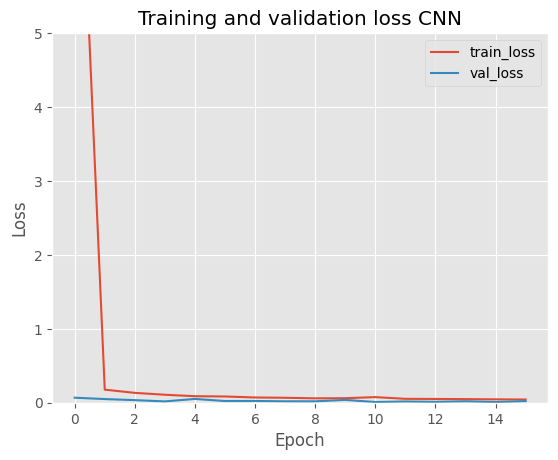

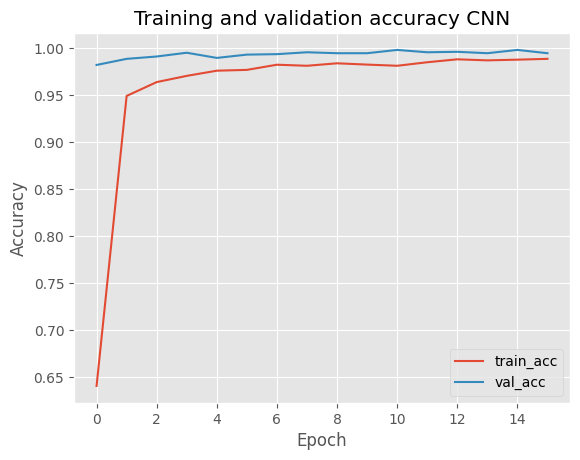

In [22]:
N = np.arange(0, len(history.history["loss"]))

plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Training and validation loss CNN")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0, 5)
plt.legend()

plt.figure()
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training and validation accuracy CNN")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [23]:
from sklearn.metrics import confusion_matrix
import cv2
import itertools

In [24]:
import tensorflow as tf

In [27]:
model = tf.keras.models.load_model('./model/not_use_vgg16_2.keras')

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,686,548 (315.42 MB)

 Trainable params: 27,562,182 (105.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 55,124,366 (210.28 MB)

In [29]:
image = cv2.imread('./PCBData/defects/copper/defect_00041000_4.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (224, 224))
print(image.shape)
# image = np.expand_dims(image, axis=0)
cv2.imshow('img', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

(224, 224)


In [30]:
predictions = list()
for path in testGen.filepaths:
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (224, 224))
    image = np.expand_dims(image, axis=0)
    preds = model.predict(image)
    predictions.append(preds.argmax(axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━

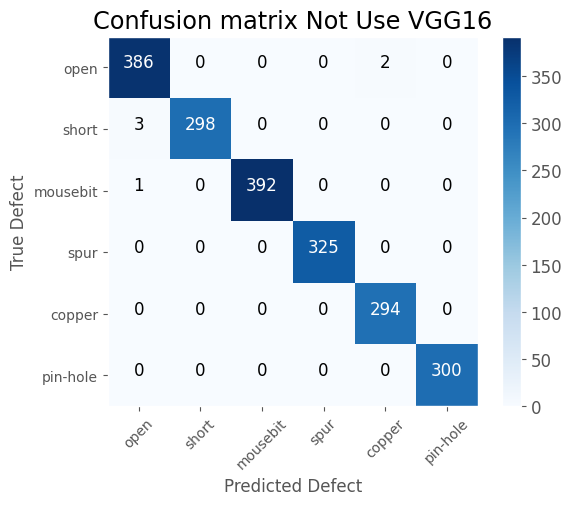

In [31]:
plt.style.use("ggplot")
plt.grid(False)
plt.rcParams["figure.figsize"] = (8,6)
font = {'size' : 12}
plt.rc('font', **font)

cm = confusion_matrix(testGen.classes, predictions)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(testGen.class_indices))

plt.xticks(tick_marks, testGen.class_indices, rotation=45)
plt.yticks(tick_marks, testGen.class_indices)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Defect')
plt.ylabel('True Defect')
plt.title('Confusion matrix Not Use VGG16')
# plt.savefig('output/vgg_confusion_matrix.png')
plt.show()

In [52]:
(368 + 275 + 379 + 249 + 293 + 298) + (4 + 13 + 2 + 1 + 0 + 22 + 1 + 3 + 12 + 2 + 2 + 8 + 64 + 2 + 1 + 2)

2001

In [32]:
(2001-6) / 2001

0.9970014992503748